In [1]:
import json
import sys
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

df_posts = pd.read_csv("../DATA/cleaned_posts.csv")
df_comments = pd.read_csv("../DATA/cleaned_comments.csv")

In [2]:
df_posts['text'] = df_posts['text'].astype(str)
df_comments['text'] = df_comments['text'].astype(str)

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
def add_sentiment_scores(df):
    # Initialize VADER SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    df['text'] = df['text'].astype(str).str.strip()

    # Calculate sentiment scores
    df['compound_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['positive_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['pos'])
    df['negative_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['neg'])
    df['neutral_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['neu'])
    return df

posts_scored = add_sentiment_scores(df_posts)
comments_scored = add_sentiment_scores(df_comments)

In [6]:
posts_scored.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,6.146000e+03,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000
mean,1.721519e+09,66.700944,0.005217,0.094978,0.090229,0.813162
std,3.388301e+05,617.858045,0.405841,0.156426,0.149212,0.199536
min,1.720915e+09,0.000000,-0.997600,0.000000,0.000000,0.000000
25%,1.721233e+09,1.000000,-0.226300,0.000000,0.000000,0.690000
50%,1.721586e+09,1.000000,0.000000,0.000000,0.000000,0.833000
75%,1.721779e+09,1.000000,0.273200,0.161750,0.162000,1.000000
max,1.722125e+09,37663.000000,0.999500,1.000000,1.000000,1.000000


In [7]:
filtered = posts_scored[posts_scored['compound_sentiment_score'] == 0.0]
print(filtered[['compound_sentiment_score', 'positive_sentiment_score', 'negative_sentiment_score', 'neutral_sentiment_score']])

      compound_sentiment_score  positive_sentiment_score  \
3                          0.0                       0.0   
4                          0.0                       0.0   
5                          0.0                       0.0   
6                          0.0                       0.0   
7                          0.0                       0.0   
...                        ...                       ...   
6137                       0.0                       0.0   
6140                       0.0                       0.0   
6143                       0.0                       0.0   
6144                       0.0                       0.0   
6145                       0.0                       0.0   

      negative_sentiment_score  neutral_sentiment_score  
3                          0.0                      1.0  
4                          0.0                      1.0  
5                          0.0                      1.0  
6                          0.0                 

In [8]:
def plot_average_sentiment(posts_df):
    # Calculate the average sentiment score per subreddit
    average_sentiment = posts_df.groupby('subreddit')['sentiment_score'].mean().reset_index()

    ordered_subreddits = ['democrats', 'Republican', 'PoliticalDiscussion']

    # Create a bar plot for average sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(x='subreddit', y='sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)
    
    # Add titles and labels
    #plt.title('Average Sentiment Score Of Posts per Subreddit', fontsize=16)
    plt.title('Average Sentiment Score Of Comments per Subreddit', fontsize=16)

    plt.xlabel('Subreddit', fontsize=14)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

C:\Users\brian\AppData\Local\Temp\ipykernel_17716\3557865067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='sentiment_score', data=average_sentiment, palette='coolwarm', order=ordered_subreddits)


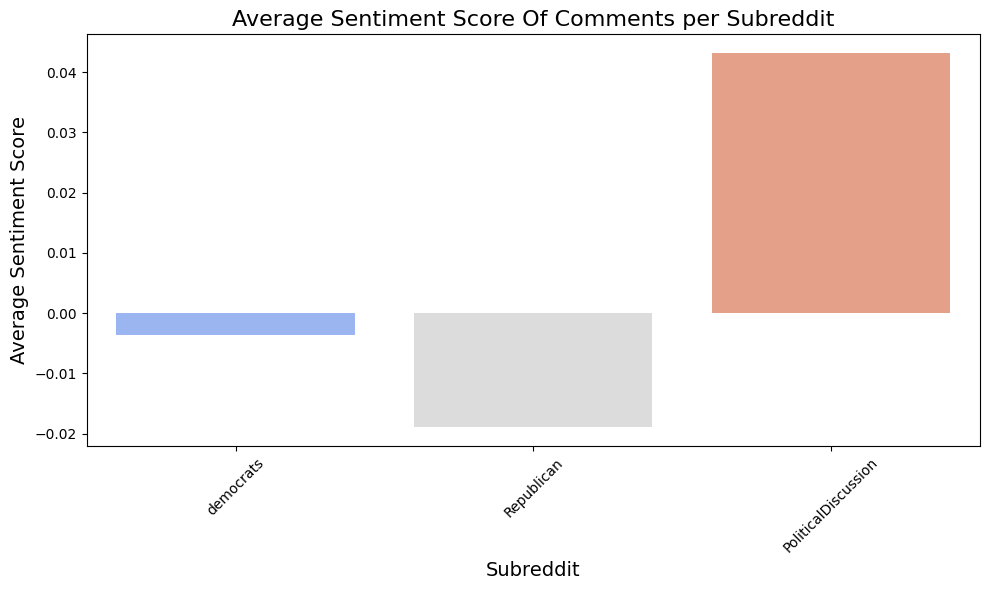

In [43]:
#plot_average_sentiment(all_post)
plot_average_sentiment(posts_scored)